In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


In [2]:
file_name = 'data/df_featured.csv'
df = pd.read_csv(file_name)

In [3]:
df

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,Nz,PCV,curvature,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR
0,2,0,1,-44.740089,95.622840,0.461706,-536.881073,1147.474078,5.540477,-536.8750,...,0.389931,0.843750,0.149344,0.724145,0.792133,0.321073,67.049772,0.987993,67.049772,0.987993
1,1,0,1,-44.734279,95.852516,0.465142,-536.811350,1150.230197,5.581708,-536.8125,...,0.588295,0.875000,0.161436,0.920210,0.984326,0.349443,53.963871,359.827117,53.963871,359.827117
2,7,0,1,-44.687991,68.614892,0.515877,-536.255891,823.378702,6.190529,-536.2500,...,0.806496,0.859375,0.155343,1.001297,1.172741,0.610511,36.245059,359.008689,36.245059,359.008689
3,14,0,1,-44.691207,68.532991,0.520316,-536.294489,822.395892,6.243798,-536.3125,...,0.708769,0.847656,0.146301,0.938384,1.105544,0.584519,44.865120,354.635177,44.865120,354.635177
4,5,0,1,-44.672647,68.584964,0.532589,-536.071764,823.019572,6.391073,-536.0625,...,0.783998,0.929688,0.109077,0.990114,1.157254,0.599092,38.371867,359.243706,38.371867,359.243706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445083,8,2,4,-44.651243,126.381397,0.485365,-535.814911,1516.576763,5.824383,-535.8125,...,0.187217,0.929688,0.075164,0.473043,0.723251,0.547103,79.209591,333.249824,79.209591,333.249824
445084,5,2,4,-44.658548,127.829311,0.456161,-535.902581,1533.951733,5.473936,-535.8750,...,0.586411,0.988281,0.052037,0.281351,0.327653,0.167923,54.097234,159.853070,54.097234,159.853070
445085,6,2,4,-44.715691,127.804043,0.368167,-536.588288,1533.648510,4.418000,-536.5625,...,0.366107,0.953125,0.077116,0.154865,0.193235,0.115570,68.524304,166.669883,68.524304,166.669883
445086,4,2,4,-44.721779,127.823110,0.305596,-536.661353,1533.877317,3.667155,-536.6875,...,0.125143,0.910156,0.043835,0.154684,0.206703,0.137110,82.810969,164.793458,82.810969,164.793458


In [4]:
# GOAL
'''
is_rail_a
is_rail_b
is_web
is_head_top
is_head_side
is_noise

'''

'\nis_rail_a\nis_rail_b\nis_web\nis_head_top\nis_head_side\nis_noise\n\n'

In [5]:
# Calculate the mean of the 'lateral' column
lateral_mean = df['lateral'].mean()

# Create binary flags
df['is_rail_a'] = (df['lateral'] < lateral_mean).astype(int)  # 1 if less than mean, else 0
df['is_rail_b'] = (df['lateral'] >= lateral_mean).astype(int) # 1 if greater than or equal to mean, else 0


In [6]:
df.describe()

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,curvature,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,is_rail_a,is_rail_b
count,445088.000000,445088.000000,445088.00000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,...,4.450880e+05,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000
mean,6.324044,1.418045,3.44398,-12.422744,66.977098,0.302900,-149.072928,803.725180,3.634798,-149.072965,...,6.317478e-02,0.530083,0.632595,0.336709,68.732542,181.887122,68.732542,181.887122,0.573210,0.426790
std,5.293839,0.799852,0.82592,37.453990,28.642543,0.125000,449.447882,343.710520,1.500005,449.447931,...,3.764652e-02,0.277402,0.291693,0.118100,23.054316,116.906969,23.054316,116.906969,0.494612,0.494612
min,0.000000,0.000000,1.00000,-44.925005,0.364759,0.000000,-539.100056,4.377103,0.000000,-539.125000,...,-8.645501e-17,0.137150,0.169088,0.097507,0.044541,0.000012,0.044541,0.000012,0.000000,0.000000
25%,2.000000,1.000000,3.00000,-44.755493,41.903643,0.224828,-537.065914,502.843713,2.697932,-537.062500,...,3.726734e-02,0.331466,0.422334,0.251480,60.183440,172.623609,60.183440,172.623609,0.000000,0.000000
50%,5.000000,2.000000,4.00000,-44.685713,68.630082,0.297971,-536.228558,823.560989,3.575652,-536.250000,...,5.243843e-02,0.408629,0.510461,0.295447,77.717117,180.057912,77.717117,180.057912,1.000000,0.000000
75%,9.000000,2.000000,4.00000,30.974642,89.470206,0.376883,371.695703,1073.642469,4.522595,371.687500,...,7.995804e-02,0.650695,0.755575,0.395858,85.965675,189.035001,85.965675,189.035001,1.000000,1.000000
max,91.000000,2.000000,4.00000,31.502451,127.864617,0.640827,378.029415,1534.375405,7.689924,378.000000,...,3.103047e-01,3.276487,3.711925,1.744426,89.999976,359.999934,89.999976,359.999934,1.000000,1.000000


In [7]:
dfa = df[df['is_rail_a'] == 1].copy()
dfb = df[df['is_rail_b'] == 1].copy()

In [8]:
df.columns


Index(['Intensity', 'Original_cloud_index', 'Classification', 'lateral',
       'axial', 'vertical', 'lateral_inch', 'axial_inch', 'vertical_inch',
       'lateral_inch_round', 'axial_inch_round', 'vertical_inch_round',
       'min_in_window', 'relative_vertical_inch', 'lam1', 'lam2', 'lam3',
       'e1x', 'e1y', 'e1z', 'e2x', 'e2y', 'e2z', 'e3x', 'e3y', 'e3z',
       'eigen_sum', 'omnivariance', 'eigenentropy', 'anisotropy', 'planarity',
       'linearity', 'surface_variation', 'sphericity', 'pca1', 'pca2',
       'verticality', 'O', 'neighbors', 'Nx', 'Ny', 'Nz', 'PCV', 'curvature',
       'roughness_mean_abs', 'roughness_rms', 'roughness_std', 'DIP', 'DIPDIR',
       'NORMDIP', 'NORMDIPDIR', 'is_rail_a', 'is_rail_b'],
      dtype='object')

In [9]:
# load_and_apply_rf.py

import json
import joblib
import numpy as np
import pandas as pd

MODEL_PATH = "rf_classification_ideal_rail.joblib"
META_PATH = "rf_classification_ideal_rail_metadata.json"

# --- 1) Load model + metadata ---
pipeline = joblib.load(MODEL_PATH)
with open(META_PATH, "r") as f:
    meta = json.load(f)

features = meta["features"]

# --- 2) Load your new dataset as df_new ---
df_new = df

# --- 3) Ensure all trained features exist in df_new ---
missing = [c for c in features if c not in df_new.columns]
if missing:
    print(f"Adding missing feature columns with NaN: {missing}")
    for c in missing:
        df_new[c] = np.nan

# Only select features in the correct order and coerce to numeric
X_new = df_new[features].copy().apply(pd.to_numeric, errors='coerce')

# --- 4) Predict ---
df_new['RF_Prediction'] = pipeline.predict(X_new)

# Optional: add confidence scores
rf = pipeline.named_steps.get('rf')
if hasattr(rf, "predict_proba"):
    proba = pipeline.predict_proba(X_new)
    df_new['RF_ProbMax'] = proba.max(axis=1)
    # Probability of the predicted class
    classes = rf.classes_
    pred_idx = pd.Series(df_new['RF_Prediction']).map({c: i for i, c in enumerate(classes)}).to_numpy()
    df_new['RF_Pred_Prob'] = proba[np.arange(len(df_new)), pred_idx]

# --- 5) Save or return ---
# df_new.to_parquet("new_with_predictions.parquet")
print("Predictions added: RF_Prediction (+ RF_ProbMax, RF_Pred_Prob if available).")

Predictions added: RF_Prediction (+ RF_ProbMax, RF_Pred_Prob if available).


In [10]:
df_new

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,is_rail_a,is_rail_b,RF_Prediction,RF_ProbMax,RF_Pred_Prob
0,2,0,1,-44.740089,95.622840,0.461706,-536.881073,1147.474078,5.540477,-536.8750,...,0.321073,67.049772,0.987993,67.049772,0.987993,1,0,2,0.550000,0.550000
1,1,0,1,-44.734279,95.852516,0.465142,-536.811350,1150.230197,5.581708,-536.8125,...,0.349443,53.963871,359.827117,53.963871,359.827117,1,0,4,0.613333,0.613333
2,7,0,1,-44.687991,68.614892,0.515877,-536.255891,823.378702,6.190529,-536.2500,...,0.610511,36.245059,359.008689,36.245059,359.008689,1,0,4,0.616667,0.616667
3,14,0,1,-44.691207,68.532991,0.520316,-536.294489,822.395892,6.243798,-536.3125,...,0.584519,44.865120,354.635177,44.865120,354.635177,1,0,4,0.723333,0.723333
4,5,0,1,-44.672647,68.584964,0.532589,-536.071764,823.019572,6.391073,-536.0625,...,0.599092,38.371867,359.243706,38.371867,359.243706,1,0,4,0.686667,0.686667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445083,8,2,4,-44.651243,126.381397,0.485365,-535.814911,1516.576763,5.824383,-535.8125,...,0.547103,79.209591,333.249824,79.209591,333.249824,1,0,2,0.380000,0.380000
445084,5,2,4,-44.658548,127.829311,0.456161,-535.902581,1533.951733,5.473936,-535.8750,...,0.167923,54.097234,159.853070,54.097234,159.853070,1,0,4,0.543333,0.543333
445085,6,2,4,-44.715691,127.804043,0.368167,-536.588288,1533.648510,4.418000,-536.5625,...,0.115570,68.524304,166.669883,68.524304,166.669883,1,0,2,0.476667,0.476667
445086,4,2,4,-44.721779,127.823110,0.305596,-536.661353,1533.877317,3.667155,-536.6875,...,0.137110,82.810969,164.793458,82.810969,164.793458,1,0,3,0.576667,0.576667


In [12]:
dfa_new = df_new[(df_new['lateral_inch'] < 0)].copy()
dfb_new = df_new[(df_new['lateral_inch'] > 0)].copy()

dfa_new_filtered = dfa_new[(dfa_new['RF_Prediction'] != 4)].copy()
dfb_new_filtered = dfb_new[(dfb_new['RF_Prediction'] != 4)].copy()

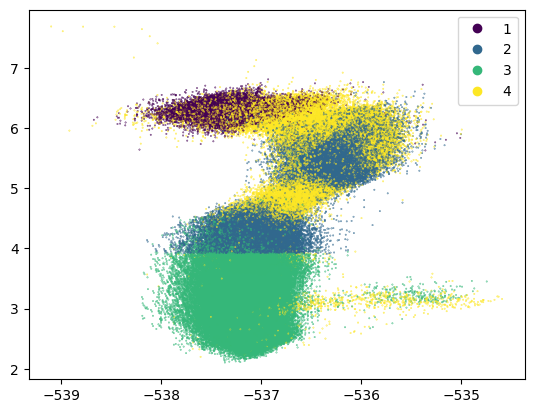

In [13]:
scatter = plt.scatter(dfa_new['lateral_inch'], dfa_new['vertical_inch'], c=dfa_new['RF_Prediction'], s=0.1)
plt.legend(*scatter.legend_elements())

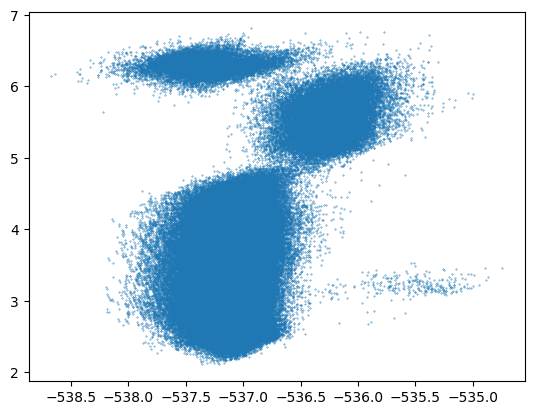

In [14]:
scatter = plt.scatter(dfa_new_filtered['lateral_inch'], dfa_new_filtered['vertical_inch'], s=0.1)

In [15]:
# Cell 1 — Setup (run first)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# --- data source ---
df_in = dfa_new_filtered.copy()   # <- your filtered frame

# --- choose features (2D by default; switch to 3D if desired) ---
feature_cols = ['lateral_inch', 'vertical_inch']  # or ['lateral_inch','axial_inch','vertical_inch']
random_state = 42
plot_sample_n = 50_000
silhouette_sample_n = 50_000

# --- numeric prep: impute + scale ---
X_raw = df_in[feature_cols].apply(pd.to_numeric, errors='coerce').to_numpy()
imputer = SimpleImputer(strategy='median')
X_num = imputer.fit_transform(X_raw)
scaler = StandardScaler()
X = scaler.fit_transform(X_num)

# --- helpers ---
def sample_idx(n, cap, seed=random_state):
    if n <= cap:
        return np.arange(n)
    rng = np.random.default_rng(seed)
    return rng.choice(n, size=cap, replace=False)

def safe_silhouette(X_arr, labels, sample_cap=silhouette_sample_n, ignore_label=-1):
    lbl = np.asarray(labels)
    if ignore_label is not None:
        mask = lbl != ignore_label
    else:
        mask = np.ones(len(lbl), dtype=bool)
    if mask.sum() < 3:
        return np.nan
    uniq = np.unique(lbl[mask])
    if len(uniq) < 2:
        return np.nan
    idx = sample_idx(mask.sum(), sample_cap)
    return float(silhouette_score(X_arr[mask][idx], lbl[mask][idx]))

def quick_scatter(dfp, col, title):
    idx = sample_idx(len(dfp), plot_sample_n)
    d = dfp.iloc[idx]
    labels = d[col].to_numpy()
    cmap = plt.get_cmap('tab10')
    unique = np.unique(labels[~pd.isna(labels)])
    colors = {l: cmap(int(l) % 10) for l in unique if l != -1}
    colors[-1] = (0.6, 0.6, 0.6, 0.6)  # gray for noise
    c = [colors.get(l, (0.2, 0.2, 0.2, 0.4)) for l in labels]
    plt.figure(figsize=(6, 6))
    plt.scatter(d['lateral_inch'], d['vertical_inch'], s=1, c=c)
    plt.title(title)
    plt.xlabel('lateral_inch')
    plt.ylabel('vertical_inch')
    plt.tight_layout()
    plt.show()

# By default, methods after DBSCAN will use these bases (updated by DBSCAN cell if you denoise)
df_base = df_in.copy()
X_base = X
print(f"Setup complete: X shape = {X.shape}, using features: {feature_cols}")

Setup complete: X shape = (201138, 2), using features: ['lateral_inch', 'vertical_inch']


[DBSCAN] eps≈0.060, min_samples=20, clusters=4, noise=2437, silhouette=0.186


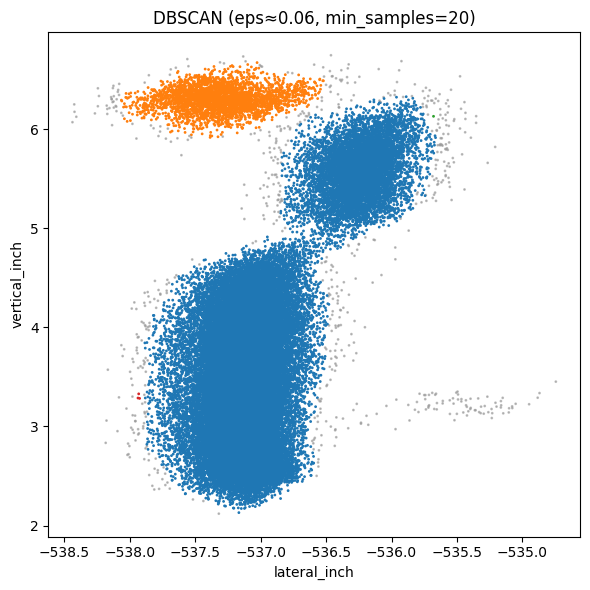

Using denoised base for next methods: kept 198701 / 201138 (98.8%) points


In [17]:
# Cell 2 — DBSCAN clustering (and optional denoise for downstream methods)
from sklearn.cluster import DBSCAN

min_samples_dbscan = 20      # tweak
quantile_for_eps = 0.98      # 95–99.5% are common

def suggest_eps(X_arr, k=min_samples_dbscan, q=quantile_for_eps):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X_arr)
    dists, _ = nn.kneighbors(X_arr)
    kth = np.sort(dists[:, -1])
    return float(np.quantile(kth, q))

eps = suggest_eps(X, min_samples_dbscan, quantile_for_eps)
dbscan = DBSCAN(eps=eps, min_samples=min_samples_dbscan, n_jobs=-1)
labels_db = dbscan.fit_predict(X)

df_in['CL_DBSCAN'] = labels_db
sil_db = safe_silhouette(X, labels_db, ignore_label=-1)
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = int((labels_db == -1).sum())
print(f"[DBSCAN] eps≈{eps:.3f}, min_samples={min_samples_dbscan}, clusters={n_clusters}, noise={n_noise}, silhouette={sil_db:.3f}")

quick_scatter(df_in, 'CL_DBSCAN', f"DBSCAN (eps≈{eps:.2f}, min_samples={min_samples_dbscan})")

# --- Optionally use DBSCAN to denoise for subsequent methods ---
use_denoised_for_next = True  # set False to keep all points downstream
if use_denoised_for_next:
    keep = labels_db != -1
    df_base = df_in.loc[keep].copy()
    X_base = X[keep]
    kept_ratio = keep.sum() / len(df_in)
    print(f"Using denoised base for next methods: kept {keep.sum()} / {len(df_in)} ({kept_ratio:.1%}) points")
else:
    df_base = df_in.copy()
    X_base = X

In [19]:
k_for_methods = 3

[Ward+connectivity] k=3, nn=20, silhouette=0.637


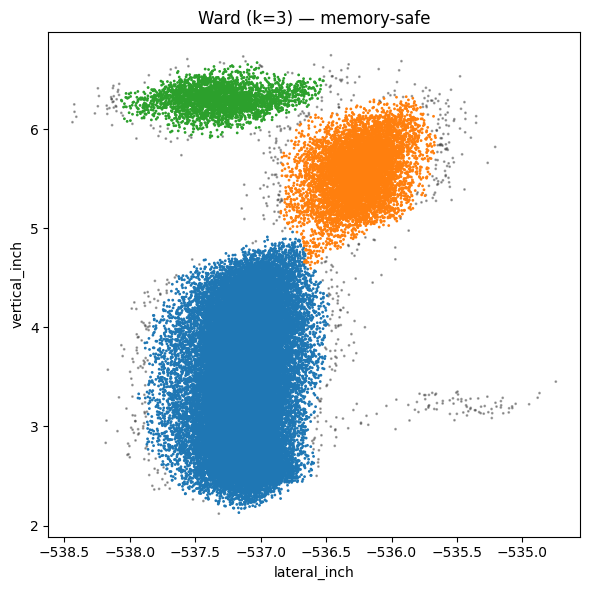

In [ ]:

# Cell 3 — Agglomerative (Ward) with memory-safe options
import numpy as np
import pandas as pd
import gc
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans
from sklearn.neighbors import kneighbors_graph, KNeighborsClassifier
from sklearn.metrics import silhouette_score

# inputs from your setup:
# X_base: np.ndarray (scaled), df_base: DataFrame aligned with X_base rows, k_for_methods: int
# helper: safe_silhouette(X_arr, labels, sample_cap=..., ignore_label=None)

# Always downcast to float32 to halve memory
Xb = X_base.astype(np.float32, copy=False)

# --- OPTION 1: Connectivity-constrained Ward (recommended first try) ---
# Uses a sparse k-NN graph to limit merges (massive memory/time reduction)
try:
    n_neighbors_graph = 20  # 10–30 typical; larger -> smoother clusters but more memory
    connectivity = kneighbors_graph(
        Xb, n_neighbors=n_neighbors_graph, include_self=False,
        mode='distance', n_jobs=-1
    )
    # Optional: downcast sparse matrix to float32 to reduce memory further
    connectivity = connectivity.astype(np.float32)

    ward = AgglomerativeClustering(
        n_clusters=k_for_methods,
        linkage='ward',
        connectivity=connectivity,
        compute_full_tree='auto'  # let sklearn decide; 'True' can increase memory
    )
    labels_ward = ward.fit_predict(Xb)

    df_base['CL_WARD'] = labels_ward
    df_in['CL_WARD'] = np.nan
    df_in.loc[df_base.index, 'CL_WARD'] = labels_ward

    sil_ward = safe_silhouette(Xb, labels_ward)
    print(f"[Ward+connectivity] k={k_for_methods}, nn={n_neighbors_graph}, silhouette={sil_ward:.3f}")

except MemoryError:
    print("MemoryError on connectivity-constrained Ward. Falling back to two-stage approach...")
    labels_ward = None
except Exception as e:
    print("Ward with connectivity failed:", e)
    labels_ward = None



# Quick plot if labels exist
if 'CL_WARD' in df_in.columns and pd.notna(df_in['CL_WARD']).any():
    quick_scatter(df_in, 'CL_WARD', f"Ward (k={k_for_methods}) — memory-safe")


[Spectral] clusters=3, silhouette=0.637 (nn=20)


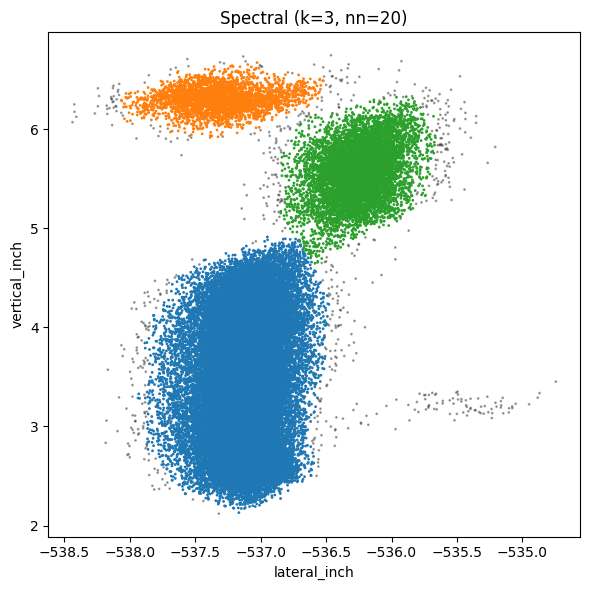

In [ ]:
# Cell 4 — Spectral Clustering
from sklearn.cluster import SpectralClustering

n_neighbors_graph = 20
n2 = X_base.shape[0]
nn = min(n_neighbors_graph, max(5, n2 - 1))

spectral = SpectralClustering(
    n_clusters=k_for_methods,
    affinity='nearest_neighbors',
    n_neighbors=nn,
    assign_labels='kmeans',
    random_state=42,
    n_init=10
)
labels_spec = spectral.fit_predict(X_base)

df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

sil_spec = safe_silhouette(X_base, labels_spec, ignore_label=None)
print(f"[Spectral] clusters={len(np.unique(labels_spec))}, silhouette={sil_spec:.3f} (nn={nn})")

quick_scatter(df_in, 'CL_SPECTRAL', f"Spectral (k={k_for_methods}, nn={nn})")

[Spectral-2stage] micro centers: 1000, from 198701 points
[Spectral-2stage] centers clustered: k=3, affinity=nearest_neighbors
[Spectral-2stage] silhouette=0.637, propagated via micro-cluster membership


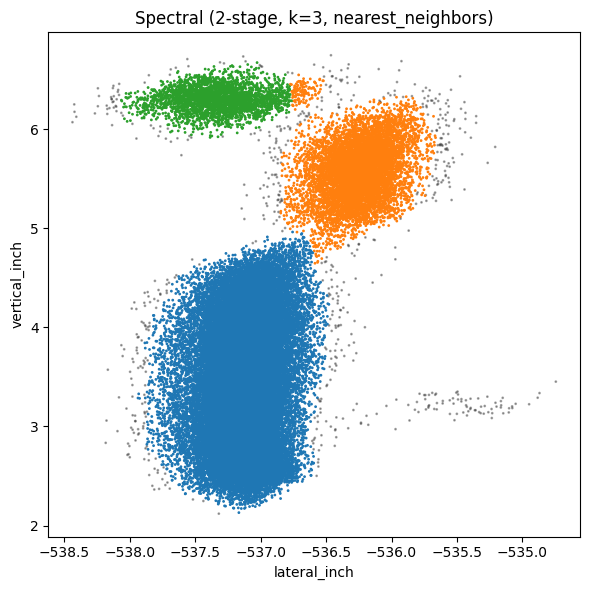

6331

In [25]:

# Cell — Spectral (two-stage: micro-centers -> spectral -> propagate)

import numpy as np
import pandas as pd
import gc
from sklearn.cluster import SpectralClustering, MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier

# ---- Config ----
k_for_methods = 3                   # number of final clusters
micro_k = 1000                      # number of micro-clusters (800–1500 is a good starting range)
n_neighbors_graph = 20              # for nearest-neighbors affinity graph (10–30 typical)
affinity_mode = 'nearest_neighbors' # 'nearest_neighbors' (fast & sparse) or 'rbf'
propagate_via_knn = False           # if True, use KNN on centers to propagate labels (smoother boundaries)
knn_neighbors = 7                   # only used if propagate_via_knn=True
random_state = 42

# ---- Data (float32 to reduce memory) ----
Xb = X_base.astype(np.float32, copy=False)

# ---- Stage 1: Micro-cluster to get centers quickly ----
mbk = MiniBatchKMeans(
    n_clusters=min(micro_k, max(2, len(Xb))), 
    batch_size=4096, 
    random_state=random_state, 
    n_init='auto'
)
micro_labels = mbk.fit_predict(Xb)
centers = mbk.cluster_centers_.astype(np.float32)
m = centers.shape[0]
print(f"[Spectral-2stage] micro centers: {m}, from {len(Xb)} points")

# ---- Stage 2: Spectral on centers ----
if affinity_mode == 'nearest_neighbors':
    nn = min(n_neighbors_graph, max(5, m - 1))
    spectral = SpectralClustering(
        n_clusters=k_for_methods,
        affinity='nearest_neighbors',
        n_neighbors=nn,
        assign_labels='kmeans',
        random_state=random_state,
        n_init=10
    )
    center_labels = spectral.fit_predict(centers)

elif affinity_mode == 'rbf':
    # RBF can work well when clusters are compact/elliptical; choose gamma heuristically
    # gamma ~ 1 / (2 * median_pairwise_distance^2) on centers (cheap for m~1000)
    from sklearn.metrics.pairwise import pairwise_distances
    # Use a small sample if centers are still large
    sample = np.arange(m) if m <= 3000 else np.random.default_rng(42).choice(m, 3000, replace=False)
    dists = pairwise_distances(centers[sample], centers[sample], metric='euclidean')
    # Use median of upper triangle (exclude zeros) as scale
    tri = dists[np.triu_indices_from(dists, k=1)]
    med = np.median(tri[tri > 0]) if np.any(tri > 0) else 1.0
    gamma = 1.0 / (2.0 * (med ** 2) + 1e-12)

    spectral = SpectralClustering(
        n_clusters=k_for_methods,
        affinity='rbf',
        gamma=gamma,
        assign_labels='kmeans',
        random_state=random_state,
        n_init=10
    )
    center_labels = spectral.fit_predict(centers)
else:
    raise ValueError("affinity_mode must be 'nearest_neighbors' or 'rbf'")

print(f"[Spectral-2stage] centers clustered: k={k_for_methods}, affinity={affinity_mode}")

# ---- Stage 3: Propagate labels from centers to all points ----
if propagate_via_knn:
    # Smooth propagation using a KNN classifier trained on centers with their spectral labels
    knn = KNeighborsClassifier(n_neighbors=knn_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, center_labels)
    labels_spec = knn.predict(Xb)
    propagation_note = f"propagated via KNN (k={knn_neighbors})"
else:
    # Fast propagation: every point gets its micro-cluster center's spectral label
    map_center_to_label = pd.Series(center_labels, index=np.arange(m))
    labels_spec = map_center_to_label.iloc[micro_labels].to_numpy()
    propagation_note = "propagated via micro-cluster membership"

# ---- Store on frames (preserves original shape) ----
df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

# ---- Score & plot ----
sil_spec = safe_silhouette(Xb, labels_spec, ignore_label=None)
print(f"[Spectral-2stage] silhouette={sil_spec:.3f}, {propagation_note}")

quick_scatter(df_in, 'CL_SPECTRAL', f"Spectral (2-stage, k={k_for_methods}, {affinity_mode})")

# Cleanup
del centers, micro_labels, center_labels
gc.collect()


In [ ]:
# Cell 5 — Gaussian Mixture (GMM)
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=k_for_methods,
    covariance_type='full',
    random_state=42,
    n_init=5
)
labels_gmm = gmm.fit_predict(X_base)

df_base['CL_GMM3'] = labels_gmm
df_in['CL_GMM3'] = np.nan
df_in.loc[df_base.index, 'CL_GMM3'] = labels_gmm

sil_gmm = safe_silhouette(X_base, labels_gmm, ignore_label=None)
print(f"[GMM-3] clusters={len(np.unique(labels_gmm))}, silhouette={sil_gmm:.3f}")



[GMM-3] clusters=3, silhouette=0.636


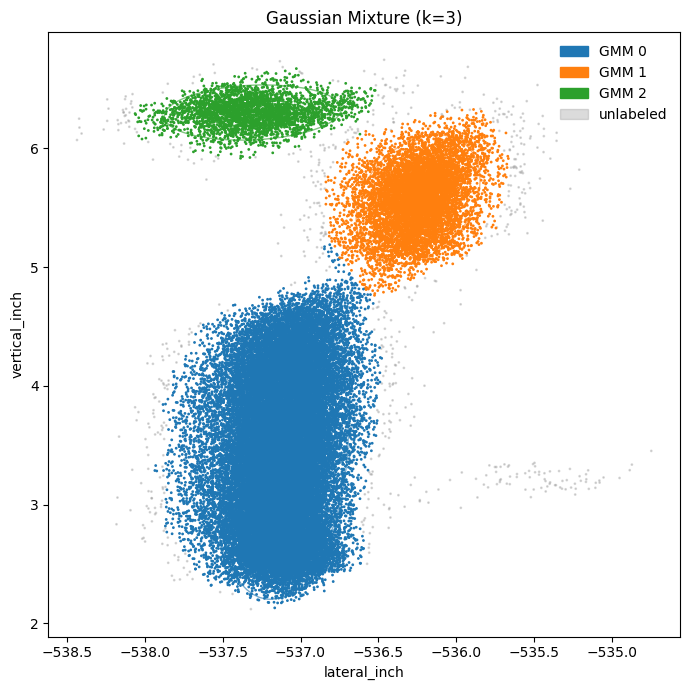

Cluster counts (GMM):
CL_GMM3
0.0    152343
1.0     33813
2.0     12545
NaN      2437
Name: count, dtype: int64


In [23]:
# Cell — Scatter for GMM results (+ optional ellipses)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- config ---
plot_sample_n = 50_000   # downsample for speed if needed
ellipse_overlay = True   # set False to skip ellipses (faster)

# --- pick axes to plot (2D) ---
# Uses the first two columns in feature_cols; by default that's ['lateral_inch','vertical_inch']
xcol, ycol = feature_cols[0], feature_cols[1]

# --- choose data to visualize (show all points, not just denoised) ---
df_plot = df_in   # df_in has the labels merged back (NaN for rows not in df_base)

# --- sample for plotting (if helper not defined, fallback simple sampler) ---
if 'sample_idx' in globals():
    idx = sample_idx(len(df_plot), plot_sample_n)
else:
    n = len(df_plot)
    idx = np.arange(n) if n <= plot_sample_n else np.random.default_rng(42).choice(n, plot_sample_n, replace=False)

d = df_plot.iloc[idx].copy()

# --- build colors ---
labels = d['CL_GMM3'].to_numpy()
unique = np.sort(pd.unique(df_plot['CL_GMM3'].dropna()))
cmap = plt.get_cmap('tab10')
color_map = {int(l): cmap(int(l) % 10) for l in unique}
default_color = (0.6, 0.6, 0.6, 0.35)  # unlabeled/NaN

colors = [color_map.get(int(l), default_color) if pd.notna(l) else default_color for l in labels]

# --- scatter ---
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(d[xcol], d[ycol], s=1, c=colors, rasterized=True)
ax.set_title(f'Gaussian Mixture (k={k_for_methods})')
ax.set_xlabel(xcol)
ax.set_ylabel(ycol)

# --- legend ---
handles = [mpatches.Patch(color=color_map[c], label=f'GMM {int(c)}') for c in unique]
handles.append(mpatches.Patch(color=default_color, label='unlabeled'))
ax.legend(handles=handles, loc='best', frameon=False)

# --- optional: overlay ellipses for each component on original units ---
# gmm.means_/covariances_ are in *scaled* space; convert back using StandardScaler
try:
    if ellipse_overlay and len(feature_cols) >= 2:
        # indices in the scaled feature space that correspond to xcol, ycol
        # Because we built X from feature_cols in order, x is dim 0, y is dim 1.
        dim_x, dim_y = 0, 1

        # Scaler parameters for these two dims (StandardScaler per-feature)
        s = np.array(scaler.scale_, dtype=float)[[dim_x, dim_y]]
        m = np.array(scaler.mean_,  dtype=float)[[dim_x, dim_y]]

        for k in range(k_for_methods):
            # Means/covariances in scaled space
            mu_s = gmm.means_[k, [dim_x, dim_y]]
            if gmm.covariance_type == 'full':
                cov_s = gmm.covariances_[k][np.ix_([dim_x, dim_y], [dim_x, dim_y])]
            elif gmm.covariance_type == 'diag':
                cov_s = np.diag(gmm.covariances_[k][[dim_x, dim_y]])
            elif gmm.covariance_type == 'tied':
                cov_s = gmm.covariances_[np.ix_([dim_x, dim_y], [dim_x, dim_y])]
            else:  # 'spherical'
                cov_s = np.eye(2) * gmm.covariances_[k]

            # Transform to original units: x = m + s * x_scaled
            mu_o = m + s * mu_s
            S = np.diag(s)
            cov_o = S @ cov_s @ S  # 2x2 covariance in original units

            # Eigen-decomposition for ellipse orientation/axes
            vals, vecs = np.linalg.eigh(cov_o)
            order = vals.argsort()[::-1]
            vals = vals[order]
            vecs = vecs[:, order]
            angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))

            # Draw 1σ and 2σ ellipses
            for nsig, alpha, lw in [(1.0, 0.9, 1.5), (2.0, 0.6, 1.0)]:
                width, height = 2 * nsig * np.sqrt(vals)  # 2 * sigma for diameter
                ell = mpatches.Ellipse(
                    xy=mu_o,
                    width=width,
                    height=height,
                    angle=angle,
                    edgecolor=color_map.get(k, (0.2, 0.2, 0.2, 0.9)),
                    facecolor='none',
                    lw=lw,
                    alpha=alpha
                )
                ax.add_patch(ell)
except Exception as e:
    print("Ellipse overlay skipped:", e)

plt.tight_layout()
plt.show()

# (Optional) quick counts
print("Cluster counts (GMM):")
print(pd.Series(df_in['CL_GMM3']).value_counts(dropna=False).sort_index())

[KMeans-3] clusters=3, silhouette=0.637


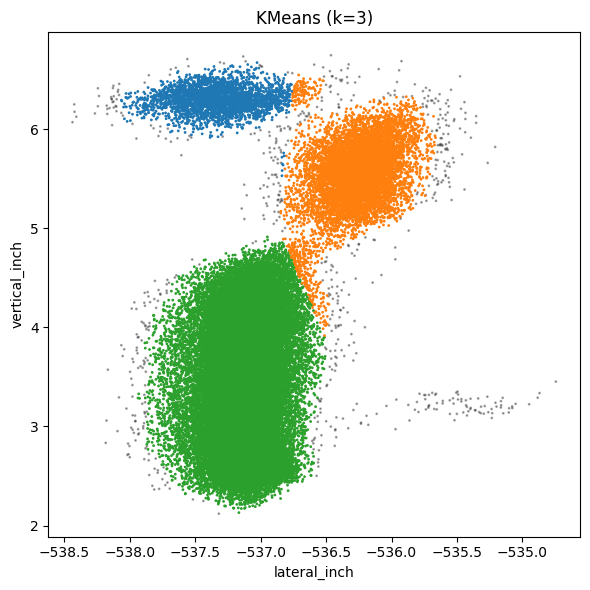

In [20]:
# Cell 6 — KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k_for_methods, random_state=42, n_init='auto')
labels_km = kmeans.fit_predict(X_base)

df_base['CL_KMEANS3'] = labels_km
df_in['CL_KMEANS3'] = np.nan
df_in.loc[df_base.index, 'CL_KMEANS3'] = labels_km

sil_km = safe_silhouette(X_base, labels_km, ignore_label=None)
print(f"[KMeans-3] clusters={len(np.unique(labels_km))}, silhouette={sil_km:.3f}")

quick_scatter(df_in, 'CL_KMEANS3', "KMeans (k=3)")

In [ ]:
# Cell 7 — Summary counts per label for each method
def cluster_counts(s):
    return pd.Series(s).value_counts(dropna=False).sort_index()

print("DBSCAN:\n",  cluster_counts(df_in['CL_DBSCAN']))
print("\nWard:\n",    cluster_counts(df_in['CL_WARD']))
print("\nSpectral:\n", cluster_counts(df_in['CL_SPECTRAL']))
print("\nGMM-3:\n",  cluster_counts(df_in['CL_GMM3']))
print("\nKMeans-3:\n", cluster_counts(df_in['CL_KMEANS3']))

NameError: name 'df_in' is not defined

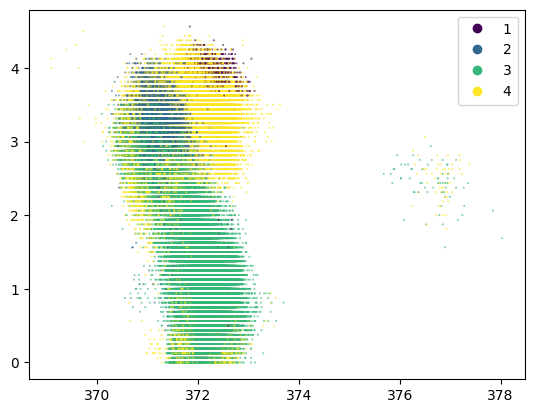

In [109]:
scatter = plt.scatter(dfb_new['lateral_inch'], dfb_new['relative_vertical_inch'], c=dfb_new['RF_Prediction'], s=0.1)
plt.legend(*scatter.legend_elements())

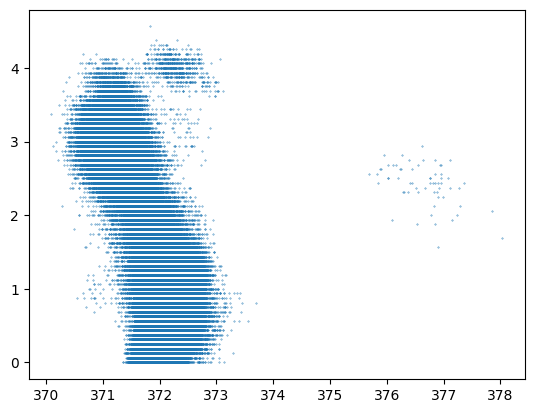

In [110]:
scatter = plt.scatter(dfb_new_filtered['lateral_inch'], dfb_new_filtered['relative_vertical_inch'],  s=0.1)

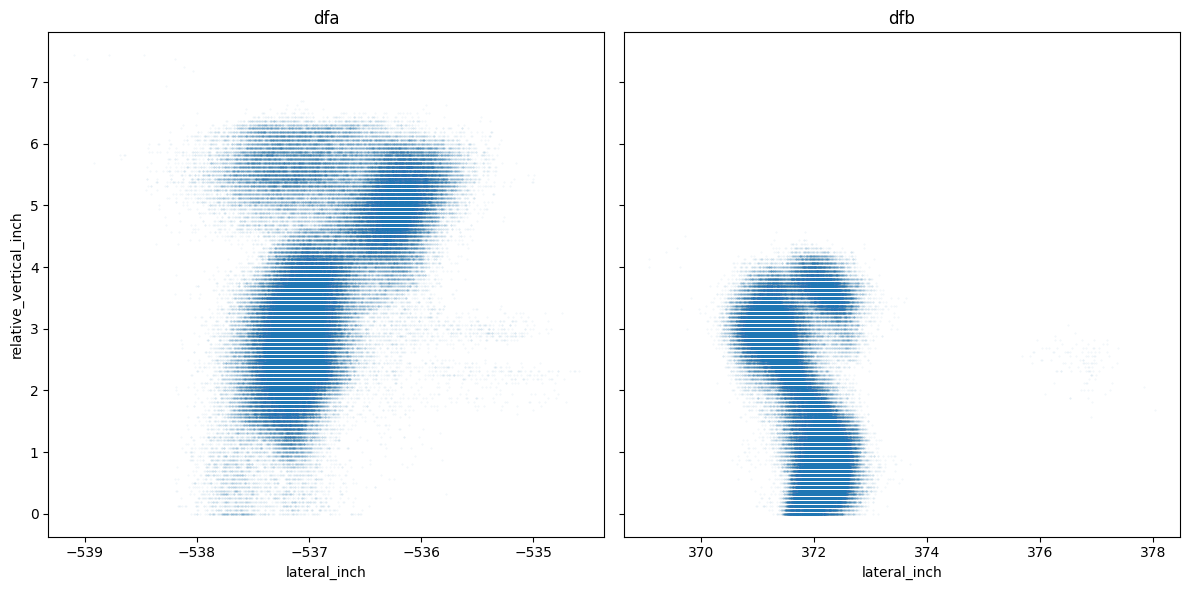

In [111]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot dfa
axes[0].scatter(dfa['lateral_inch'], dfa['relative_vertical_inch'], s=0.1, alpha=0.1)
axes[0].set_title('dfa')
axes[0].set_xlabel('lateral_inch')
axes[0].set_ylabel('relative_vertical_inch')

# Plot dfb
axes[1].scatter(dfb['lateral_inch'], dfb['relative_vertical_inch'], s=0.1, alpha=0.1)
axes[1].set_title('dfb')
axes[1].set_xlabel('lateral_inch')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Intensity', 'Original_cloud_index', 'Classification', 'lateral',
       'axial', 'vertical', 'lateral_inch', 'axial_inch', 'vertical_inch',
       'lateral_inch_round', 'axial_inch_round', 'vertical_inch_round',
       'min_in_window', 'relative_vertical_inch', 'lam1', 'lam2', 'lam3',
       'e1x', 'e1y', 'e1z', 'e2x', 'e2y', 'e2z', 'e3x', 'e3y', 'e3z',
       'eigen_sum', 'omnivariance', 'eigenentropy', 'anisotropy', 'planarity',
       'linearity', 'surface_variation', 'sphericity', 'pca1', 'pca2',
       'verticality', 'O', 'neighbors', 'Nx', 'Ny', 'Nz', 'PCV', 'curvature',
       'roughness_mean_abs', 'roughness_rms', 'roughness_std', 'DIP', 'DIPDIR',
       'NORMDIP', 'NORMDIPDIR', 'is_rail_a', 'is_rail_b'],
      dtype='object')

In [ ]:
# ---- 1) Prepare features ----
cols = ['lateral_inch', 'relative_vertical_inch', 'axial_inch','lam1', 'lam2', 'lam3', 'e1x', 'e1y', 'e1z', 'e2x', 'e2y', 'e2z', 'e3x',
       'e3y', 'e3z', 'eigen_sum', 'omnivariance', 'eigenentropy', 'anisotropy',
       'planarity', 'linearity', 'surface_variation', 'sphericity', 'pca1',
       'pca2', 'verticality', 'O', 'neighbors', 'Nx', 'Ny', 'Nz', 'PCV',
       'curvature', 'roughness_mean_abs', 'roughness_rms', 'roughness_std',
       'DIP', 'DIPDIR', 'NORMDIP', 'NORMDIPDIR']
Xa = dfa[cols].to_numpy()
Xb = dfb[cols].to_numpy()

# ---- 2) Scale features (CRITICAL for DBSCAN) ----
scaler_a = StandardScaler()
scaler_b = StandardScaler()
Xa_scaled = scaler_a.fit_transform(Xa)
Xb_scaled = scaler_b.fit_transform(Xb)

# ---- 3) Helper: find eps via k-distance "knee" ----
def k_distance_eps(X_scaled, min_samples=20, plot=False, title=''):
    """
    Compute k-distance curve for min_samples and return a knee-based eps guess.
    """
    # Nearest neighbors: the k-th neighbor distance for each point
    nn = NearestNeighbors(n_neighbors=min_samples)
    nn.fit(X_scaled)
    dists, _ = nn.kneighbors(X_scaled)
    kth = np.sort(dists[:, -1])  # k-th nearest neighbor distance, sorted ascending

    # Knee detection (max distance to the line between first and last points)
    x = np.arange(len(kth))
    p1 = np.array([x[0], kth[0]], dtype=float)
    p2 = np.array([x[-1], kth[-1]], dtype=float)
    line_vec = p2 - p1
    line_vec /= np.linalg.norm(line_vec) + 1e-12
    # perpendicular distance from each point to the p1->p2 line
    vecs = np.vstack((x, kth)).T - p1
    d_perp = np.abs(np.cross(line_vec, vecs)).astype(float)
    knee_idx = int(np.argmax(d_perp))
    eps_guess = float(kth[knee_idx])

    if plot:
        plt.figure(figsize=(5,3))
        plt.plot(kth, lw=1)
        plt.scatter([knee_idx], [kth[knee_idx]], color='red', s=40, zorder=3, label=f'eps ≈ {eps_guess:.3f}')
        plt.title(f'k-distance plot {title} (k=min_samples={min_samples})')
        plt.xlabel('Points sorted by distance')
        plt.ylabel('k-th NN distance')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return eps_guess

# ---- 4) Run DBSCAN (with auto eps & gentle fallback if all-noise) ----
def run_dbscan(X_scaled, min_samples=20, eps=None, plot_kdist_title=''):
    if eps is None:
        eps = k_distance_eps(X_scaled, min_samples=min_samples, plot=False, title=plot_kdist_title)
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_scaled)

    # If all noise, relax eps progressively (cap iterations to avoid runaway)
    iters = 0
    while np.all(labels == -1) and iters < 6:
        eps *= 1.25
        labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_scaled)
        iters += 1
    return labels, eps

# Choose starting min_samples based on density; 20–50 is common.
min_samples_a = 30
min_samples_b = 30

labels_a, eps_a = run_dbscan(Xa_scaled, min_samples=min_samples_a, eps=None, plot_kdist_title='dfa')
labels_b, eps_b = run_dbscan(Xb_scaled, min_samples=min_samples_b, eps=None, plot_kdist_title='dfb')

dfa['cluster_da'] = labels_a
dfb['cluster_db'] = labels_b

# Print quick stats
def cluster_stats(labels, name=''):
    n_noise = int(np.sum(labels == -1))
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f'{name}: clusters={n_clusters}, noise={n_noise}')

cluster_stats(labels_a, 'dfa')
cluster_stats(labels_b, 'dfb')
print(f'Used eps: dfa={eps_a:.4f} (scaled units), dfb={eps_b:.4f} (scaled units)')
print(f'min_samples: dfa={min_samples_a}, dfb={min_samples_b}')




C:\Users\yeoman\AppData\Local\Temp\ipykernel_57200\1393177784.py:36: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  d_perp = np.abs(np.cross(line_vec, vecs)).astype(float)
C:\Users\yeoman\AppData\Local\Temp\ipykernel_57200\1393177784.py:36: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  d_perp = np.abs(np.cross(line_vec, vecs)).astype(float)


dfa: clusters=12, noise=2007
dfb: clusters=3, noise=2081
Used eps: dfa=3.6479 (scaled units), dfb=3.8373 (scaled units)
min_samples: dfa=30, dfb=30


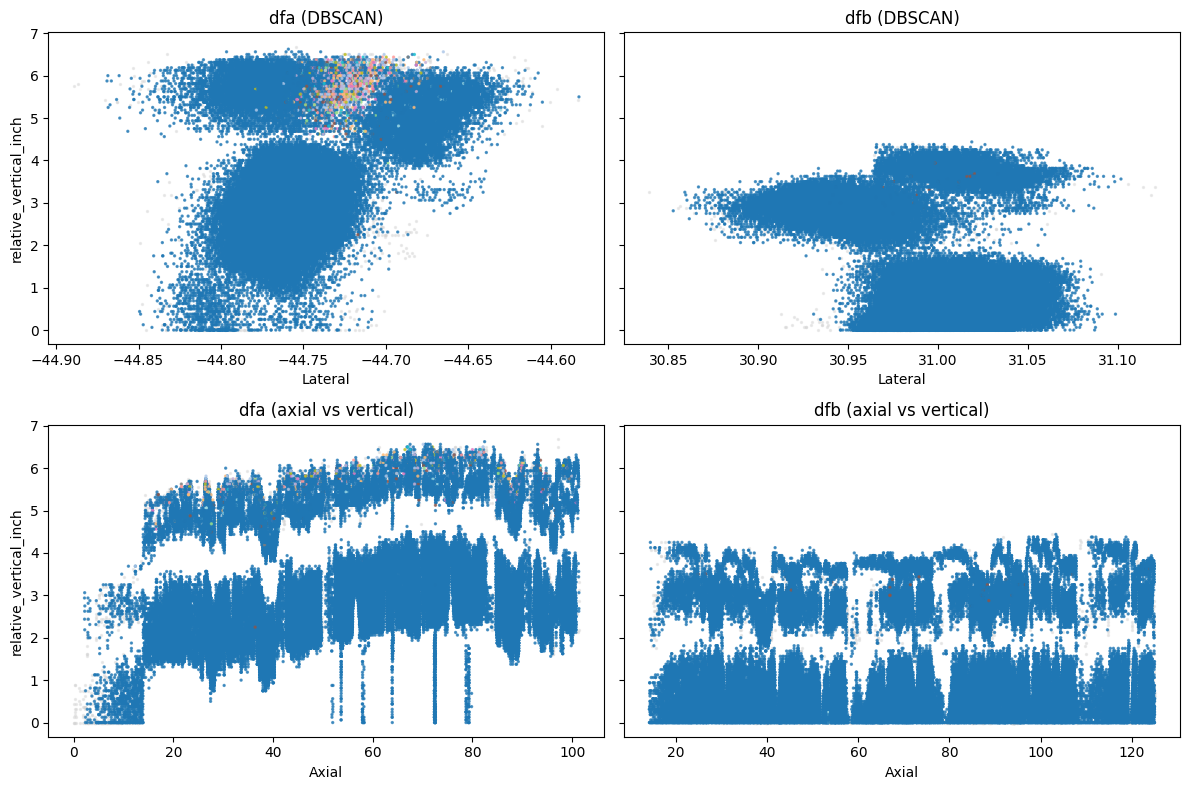

In [ ]:
# ---- 5) Plot (noise in lightgray, clusters colored) ----
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
y_col = 'relative_vertical_inch'

def scatter_db(ax, x, y, labels, title, xlab, ylab=None):
    noise = labels == -1
    # Noise first (gray)
    ax.scatter(x[noise], y[noise], color='lightgray', s=2, alpha=0.4, label='noise')
    # Then clusters
    core = ~noise
    if np.any(core):
        sc = ax.scatter(x[core], y[core], c=labels[core], cmap='tab20', s=2, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlab)
    if ylab:
        ax.set_ylabel(ylab)

# Top row: lateral vs relative_vertical_inch
scatter_db(
    axes[0,0],
    dfa['lateral'].to_numpy(),
    dfa[y_col].to_numpy(),
    dfa['cluster_da'].to_numpy(),
    title=f'dfa (DBSCAN)',
    xlab='Lateral',
    ylab=y_col
)
scatter_db(
    axes[0,1],
    dfb['lateral'].to_numpy(),
    dfb[y_col].to_numpy(),
    dfb['cluster_db'].to_numpy(),
    title=f'dfb (DBSCAN)',
    xlab='Lateral'
)

# Bottom row: axial vs relative_vertical_inch (colored by same labels as above)
scatter_db(
    axes[1,0],
    dfa['axial'].to_numpy(),
    dfa[y_col].to_numpy(),
    dfa['cluster_da'].to_numpy(),
    title='dfa (axial vs vertical)',
    xlab='Axial',
    ylab=y_col
)
scatter_db(
    axes[1,1],
    dfb['axial'].to_numpy(),
    dfb[y_col].to_numpy(),
    dfb['cluster_db'].to_numpy(),
    title='dfb (axial vs vertical)',
    xlab='Axial'
)

plt.tight_layout()
plt.show()

dfb[~dfb['cluster_db'].isin([0, -1])].describe()

dfb.loc[dfb['cluster_db'].isin([2,3,4,5,6])] =1

In [ ]:
dfa.describe()  

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,is_rail_a,is_rail_b,cluster_da
count,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,...,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.000000,88164.0,88164.0,88164.000000
mean,6.712411,1.595005,2.595005,-44.748012,57.796811,0.341114,-536.976145,693.561736,4.093374,-536.976292,...,0.504773,0.628834,0.365731,70.758342,177.996483,70.758342,177.996483,1.0,0.0,0.063575
std,5.180990,0.699946,0.699946,0.035549,24.110112,0.106868,0.426590,289.321347,1.282413,0.426913,...,0.325016,0.349240,0.152349,27.687378,127.216480,27.687378,127.216480,0.0,0.0,0.759789
min,0.000000,0.000000,1.000000,-44.889411,0.000000,0.179246,-538.672930,0.000000,2.150954,-538.687500,...,0.052477,0.074820,0.053332,0.132211,0.000340,0.132211,0.000340,1.0,0.0,-1.000000
25%,3.000000,1.000000,2.000000,-44.770142,37.654721,0.256172,-537.241705,451.856653,3.074070,-537.250000,...,0.278294,0.387601,0.266708,63.433451,19.840811,63.433451,19.840811,1.0,0.0,0.000000
50%,5.000000,2.000000,3.000000,-44.756094,57.530863,0.307931,-537.073123,690.370360,3.695169,-537.062500,...,0.342092,0.451004,0.294944,85.276188,179.937726,85.276188,179.937726,1.0,0.0,0.000000
75%,10.000000,2.000000,3.000000,-44.737852,77.318162,0.461509,-536.854228,927.817945,5.538107,-536.875000,...,0.675674,0.818553,0.415513,88.055394,328.215541,88.055394,328.215541,1.0,0.0,0.000000
max,65.000000,2.000000,3.000000,-44.582908,101.346122,0.594354,-534.994901,1216.153462,7.132245,-535.000000,...,2.769523,3.244690,1.690491,89.999981,359.999834,89.999981,359.999834,1.0,0.0,11.000000


In [ ]:
dfb.describe()  


,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,is_rail_a,is_rail_b,cluster_db
count,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,...,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.000000,82472.0,82472.0,82472.000000
mean,6.837763,4.505735,2.505735,30.994342,70.646807,0.190650,371.932100,847.761681,2.287800,371.932169,...,0.602468,0.696529,0.336202,64.849655,183.334935,64.849655,183.334935,0.0,1.0,-0.024032
std,5.411024,0.686484,0.686484,0.038299,30.128633,0.110480,0.459591,361.543597,1.325758,0.460032,...,0.291858,0.298499,0.114339,22.082422,103.463846,22.082422,103.463846,0.0,0.0,0.162970
min,0.000000,3.000000,1.000000,30.839347,14.109883,0.000000,370.072167,169.318591,0.000000,370.062500,...,0.055614,0.073157,0.047530,0.093348,0.000342,0.093348,0.000342,0.0,1.0,-1.000000
25%,3.000000,4.000000,2.000000,30.968340,44.332989,0.098163,371.620085,531.995872,1.177960,371.625000,...,0.381548,0.470357,0.254384,55.081463,175.028210,55.081463,175.028210,0.0,1.0,0.000000
50%,5.000000,5.000000,3.000000,31.000705,70.687092,0.159084,372.008463,848.245104,1.909008,372.000000,...,0.516559,0.614041,0.311262,71.849549,179.987712,71.849549,179.987712,0.0,1.0,0.000000
75%,10.000000,5.000000,3.000000,31.022971,94.656631,0.290171,372.275652,1135.879576,3.482057,372.250000,...,0.760540,0.862197,0.392981,81.278851,185.776933,81.278851,185.776933,0.0,1.0,0.000000
max,91.000000,5.000000,3.000000,31.120543,125.075185,0.459918,373.446521,1500.902224,5.519015,373.437500,...,2.616175,3.037480,1.543345,89.999975,359.999757,89.999975,359.999757,0.0,1.0,2.000000


In [ ]:
dfb['cluster_db'].value_counts()


cluster_db
 0    80321
-1     2081
 1       41
 2       29
Name: count, dtype: int64

In [ ]:
dfa = dfa[dfa['cluster_da'].isin([-1,0,1])].copy()
dfb = dfb[dfb['cluster_db'].isin([-1,0,1])].copy()

In [ ]:
dfa0 = dfa[dfa['cluster_da'] == 1].copy()
dfa1 = dfa[dfa['cluster_da'] == 0].copy()

dfb0 = dfb[dfb['cluster_db'] == 0].copy()
dfb1 = dfb[dfb['cluster_db'] == 1].copy()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import DBSCAN

# -----------------------------
# 1) Prepare features for DBSCAN
# -----------------------------
Xa = dfa0[['Illuminance_(PCV)',	'lateral', 'relative_vertical_inch']].to_numpy()
Xb = dfb1[['Illuminance_(PCV)',	'lateral', 'relative_vertical_inch']].to_numpy()

# -----------------------------
# 2) Fit DBSCAN
# -----------------------------
# Tip: With 3D features, distances increase; you may need a larger eps than dfa1.
dbscan_a = DBSCAN(eps=0.02, min_samples=100)  # your prior setting for dfa1
dbscan_b = DBSCAN(eps=0.2, min_samples=100)  # start point for 3D; adjust as needed

dfa0['cluster'] = dbscan_a.fit_predict(Xa)
dfb1['cluster'] = dbscan_b.fit_predict(Xb)

# -----------------------------
# 3) Helper: scatter with legend (clusters + Noise)
# -----------------------------
def scatter_with_legend(ax, x, y, labels, title, xlab, ylab=None, cmap='tab20', s=0.5, alpha_pts=0.5):
    labels = np.asarray(labels)
    noise = labels == -1
    non_noise = ~noise

    # Plot noise in light gray
    if np.any(noise):
        ax.scatter(x[noise], y[noise], color='lightgray', s=s, alpha=0.4, label='Noise')

    sc = None
    handles_out, labels_out = [], []
    if np.any(non_noise):
        sc = ax.scatter(x[non_noise], y[non_noise],
                        c=labels[non_noise], cmap=cmap, s=s, alpha=alpha_pts)
        # Build cluster legend entries
        unique_clusters = sorted(np.unique(labels[non_noise]).astype(int))
        handles, _ = sc.legend_elements(num=unique_clusters)
        cluster_text = [f'Cluster {u}' for u in unique_clusters]
        handles_out += handles
        labels_out += cluster_text

    # Add noise handle if present
    if np.any(noise):
        noise_handle = Line2D([0], [0], marker='o', linestyle='None',
                              markerfacecolor='lightgray', markeredgecolor='none',
                              label='Noise', markersize=1)
        handles_out.append(noise_handle)
        labels_out.append('Noise')

    ax.set_title(title)
    ax.set_xlabel(xlab)
    if ylab:
        ax.set_ylabel(ylab)

    if handles_out:
        ax.legend(handles_out, labels_out, title='Clusters', loc='best', frameon=True, markerscale=1)

# -----------------------------
# 4) 2×2 layout:
#     Top row  -> Lateral vs Vertical (dfa1, dfb1)
#     Bottom   -> Axial   vs Vertical (dfa1, dfb1)
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Top-left: dfa1 (Lateral vs Vertical)
scatter_with_legend(
    axes[0, 0],
    dfa0['lateral'].to_numpy(),
    dfa0['relative_vertical_inch'].to_numpy(),
    dfa0['cluster'].to_numpy(),
    title='dfa1 (Lateral vs Vertical)',
    xlab='Lateral',
    ylab='Relative Vertical (inch)',
    s=0.5, alpha_pts=0.5
)

# Top-right: dfb1 (Lateral vs Vertical)
scatter_with_legend(
    axes[0, 1],
    dfb1['lateral'].to_numpy(),
    dfb1['relative_vertical_inch'].to_numpy(),
    dfb1['cluster'].to_numpy(),
    title='dfb1 (Lateral vs Vertical; 3 features clustered)',
    xlab='Lateral',
    ylab='Relative Vertical (inch)',
    s=0.5, alpha_pts=0.5
)

# Bottom-left: dfa1 (Axial vs Vertical)
scatter_with_legend(
    axes[1, 0],
    dfa0['axial'].to_numpy(),
    dfa0['relative_vertical_inch'].to_numpy(),
    dfa0['cluster'].to_numpy(),
    title='dfa1 (Axial vs Vertical)',
    xlab='Axial',
    ylab='Relative Vertical (inch)',
    s=0.5, alpha_pts=0.5
)

# Bottom-right: dfb1 (Axial vs Vertical)
scatter_with_legend(
    axes[1, 1],
    dfb1['axial'].to_numpy(),
    dfb1['relative_vertical_inch'].to_numpy(),
    dfb1['cluster'].to_numpy(),
    title='dfb1 (Axial vs Vertical; 3 features clustered)',
    xlab='Axial',
    ylab='Relative Vertical (inch)',
    s=0.5, alpha_pts=0.5
)

plt.tight_layout()
plt.show()

KeyError: "['Illuminance_(PCV)'] not in index"

In [ ]:
dfa1['cluster'].value_counts()

cluster
1    63419
Name: count, dtype: int64

In [ ]:
dfa1.loc[:, 'cluster'] = dfa1['cluster'].replace({0: 2})

In [ ]:
dfa.loc[dfa1.index, 'cluster'] = dfa1['cluster'].astype(dfa['cluster'].dtype)

In [ ]:
dfa.describe()


,Illuminance_(PCV),lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,relative_vertical_inch,is_rail_a,is_rail_b,cluster,cluster_db
count,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.0,88244.0,88244.000000,88244.000000
mean,0.693759,-44.748019,57.785412,0.341255,-536.976233,693.424938,4.095057,4.095057,1.0,0.0,0.718678,0.271101
std,0.138757,0.035573,24.125396,0.106950,0.426873,289.504751,1.283394,1.283394,0.0,0.0,0.449647,0.461344
min,0.464431,-44.923415,0.000000,0.179246,-539.080983,0.000000,2.150954,2.150954,1.0,0.0,0.000000,-1.000000
25%,0.587398,-44.770148,37.642361,0.256213,-537.241780,451.708326,3.074560,3.074560,1.0,0.0,0.000000,0.000000
50%,0.634146,-44.756094,57.528622,0.308041,-537.073123,690.343459,3.696490,3.696490,1.0,0.0,1.000000,0.000000
75%,0.834350,-44.737833,77.322077,0.461645,-536.853993,927.864925,5.539742,5.539742,1.0,0.0,1.000000,1.000000
max,1.000000,-44.582908,101.346122,0.649260,-534.994901,1216.153462,7.791125,7.791125,1.0,0.0,1.000000,1.000000


In [ ]:
dfa['cluster'].value_counts()

cluster
1    63419
0    24825
Name: count, dtype: int64

NameError: name 'scatter' is not defined

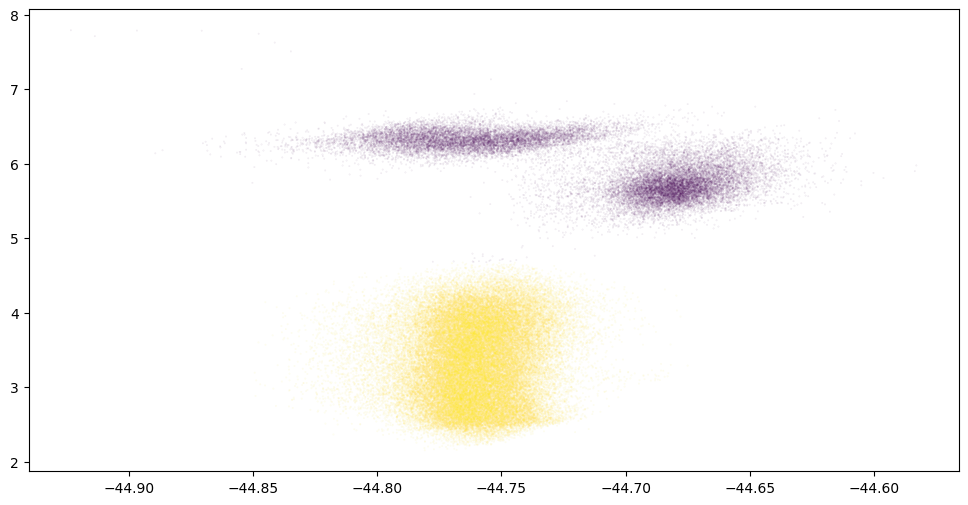

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(dfa['lateral'], dfa['relative_vertical_inch'],s =0.1, alpha=0.1, c=dfa['cluster'])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()

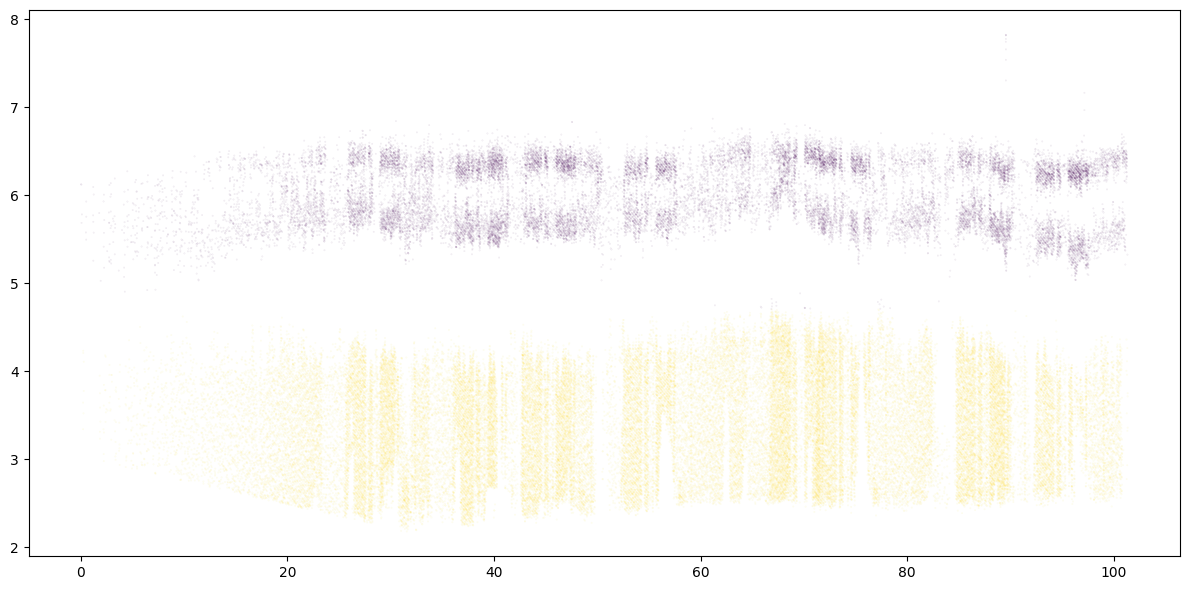

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(dfa['axial'], dfa['relative_vertical_inch'],s =0.1, alpha=0.1, c=dfa['cluster'])
plt.tight_layout()
plt.show()

In [ ]:
dfa.loc[:, 'is_web'] = (dfa['cluster'] == 0).astype(int)
dfa.loc[:, 'is_head_top'] = (dfa['cluster'] == 1).astype(int)
dfa.loc[:, 'is_head_side'] = (dfa['cluster'] == 2).astype(int)
dfa.loc[:, 'is_noise'] = (dfa['cluster'] == -1).astype(int)

dfa.drop(columns=['cluster'])

dfa

,Illuminance_(PCV),lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,relative_vertical_inch,is_rail_a,is_rail_b,cluster,cluster_db,is_web,is_head_top,is_head_side,is_noise
0,0.622967,-44.760665,87.509077,0.293026,-537.127977,1050.108921,3.516313,3.516313,1,0,1,0,0,1,0,0
1,0.550813,-44.768196,85.102582,0.299163,-537.218351,1021.230986,3.589960,3.589960,1,0,1,0,0,1,0,0
2,0.597561,-44.770458,82.318610,0.330027,-537.245497,987.823323,3.960325,3.960325,1,0,1,0,0,1,0,0
3,0.601626,-44.769657,87.114616,0.236041,-537.235885,1045.375392,2.832488,2.832488,1,0,1,0,0,1,0,0
4,0.593496,-44.783512,86.833426,0.285843,-537.402140,1042.001112,3.430111,3.430111,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88239,0.935976,-44.741325,3.156840,0.475268,-536.895904,37.882085,5.703221,5.703221,1,0,0,-1,1,0,0,0
88240,0.918699,-44.709192,3.139139,0.465418,-536.510305,37.669667,5.585016,5.585016,1,0,0,1,1,0,0,0
88241,0.966463,-44.802347,12.300187,0.521926,-537.628168,147.602244,6.263115,6.263115,1,0,0,1,1,0,0,0
88242,0.975610,-44.808918,11.935959,0.520106,-537.707016,143.231505,6.241273,6.241273,1,0,0,1,1,0,0,0
